## Import Libraries

In [2]:
import pandas as pd 
import os
from plotnine import *

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-06-08/fishing.csv')
df

,year,lake,species,grand_total,comments,region,values
0,1991,Erie,American Eel,1.0,NaN,Michigan (MI),0.0
1,1991,Erie,American Eel,1.0,NaN,New York (NY),0.0
2,1991,Erie,American Eel,1.0,NaN,Ohio (OH),0.0
3,1991,Erie,American Eel,1.0,NaN,Pennsylvania (PA),0.0
4,1991,Erie,American Eel,1.0,NaN,U.S. Total,0.0
...,...,...,...,...,...,...,...
65701,2008,Saint Clair,White Bass,4.0,NaN,Canada (ONT),4.0
65702,2008,Saint Clair,White Perch,4.0,NaN,U.S. Total (MI),NaN
65703,2008,Saint Clair,White Perch,4.0,NaN,Canada (ONT),4.0
65704,2008,Saint Clair,Yellow Perch,NaN,NaN,U.S. Total (MI),NaN


In [4]:
df.drop_duplicates(inplace = True)

In [5]:
fishes = df.copy()

# Data Dictionary

|variable    |class     |description |
|:----------:|:--------:|:----------:|
|year        |double    | Year of measurement |
|lake        |character | Lake Name |
|species     |character | Species of fish |
|grand_total |double    | Grand total of observed |
|comments    |character | Comments from the dataset providers |
|region      |character | Region of the US/Canada, note there is some inconsistency |
|values      |double    | Production amounts have been rounded to the nearest thousand pounds |


In [6]:
fishes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65705 entries, 0 to 65705
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         65705 non-null  int64  
 1   lake         65705 non-null  object 
 2   species      65705 non-null  object 
 3   grand_total  33939 non-null  float64
 4   comments     5503 non-null   object 
 5   region       65705 non-null  object 
 6   values       43789 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 4.0+ MB


In [7]:
fishes['region'].unique()

array(['Michigan (MI)', 'New York (NY)', 'Ohio (OH)', 'Pennsylvania (PA)',
       'U.S. Total', 'Canada (ONT)', 'U.S. Total (NY)',
       'U.S. Huron Proper (HP)', 'U.S. Saginaw Bay (SB)',
       'U.S. Total (MI)', 'Huron Proper (HP)', 'Georgian Bay (GB)',
       'North Channel (NC)', 'Total Canada (ONT)', 'Wisconsin (WI)',
       'Minnesota (MN)', 'Green Bay (MI)', 'Mich. Proper (MI)',
       'MI State Total', 'Green Bay (WI)', 'Mich. Proper (WI)',
       'WI State Total', 'Illinois (IL)', 'Indiana (IN)'], dtype=object)

#### Get the dataframes for Canada and USA seperately

In [8]:
canada = ['Total Canada (ONT)', 'Canada (ONT)']
canada_df = fishes[fishes['region'].isin(canada)].sort_values('year').drop(columns = ['grand_total', 'comments'])
canada_df

,year,lake,species,region,values
38929,1867,Superior,Lake Trout,Canada (ONT),117.0
33888,1867,Huron,Walleye,Total Canada (ONT),137.0
27476,1867,Huron,Lake Whitefish,Total Canada (ONT),1565.0
26433,1867,Huron,Lake Trout,Total Canada (ONT),974.0
23850,1867,Huron,Cisco and Chubs,Total Canada (ONT),872.0
...,...,...,...,...,...
15173,2015,Ontario,Bowfin,Canada (ONT),3.0
14633,2015,Erie,Yellow Perch,Canada (ONT),4460.0
13619,2015,Erie,White Bass,Canada (ONT),3979.0
36514,2015,Superior,Burbot,Canada (ONT),0.0


In [9]:
usa = ['U.S. Total (NY)', 'U.S. Total (MI)', 'U.S. Total']
usa_df = fishes[fishes['region'].isin(usa)].sort_values('year').drop(columns = ['grand_total', 'comments'])
usa_df

,year,lake,species,region,values
38928,1867,Superior,Lake Trout,U.S. Total,NaN
17086,1867,Ontario,Lake Whitefish,U.S. Total (NY),NaN
27472,1867,Huron,Lake Whitefish,U.S. Total (MI),NaN
12634,1867,Erie,Walleye and Blue Pike,U.S. Total,NaN
16820,1867,Ontario,Lake Trout,U.S. Total (NY),NaN
...,...,...,...,...,...
20346,2015,Huron,Burbot,U.S. Total (MI),1.00000
5818,2015,Erie,Gizzard Shad,U.S. Total,25.00000
39668,2015,Superior,Lake Trout,U.S. Total,334.14025
62220,2015,Michigan,White Perch,U.S. Total,0.00000


In [10]:
# Drop rows where any column = NA
canada_df = canada_df.dropna()
canada_df

,year,lake,species,region,values
38929,1867,Superior,Lake Trout,Canada (ONT),117.0
33888,1867,Huron,Walleye,Total Canada (ONT),137.0
27476,1867,Huron,Lake Whitefish,Total Canada (ONT),1565.0
26433,1867,Huron,Lake Trout,Total Canada (ONT),974.0
23850,1867,Huron,Cisco and Chubs,Total Canada (ONT),872.0
...,...,...,...,...,...
15173,2015,Ontario,Bowfin,Canada (ONT),3.0
14633,2015,Erie,Yellow Perch,Canada (ONT),4460.0
13619,2015,Erie,White Bass,Canada (ONT),3979.0
36514,2015,Superior,Burbot,Canada (ONT),0.0


In [11]:
canada_grouped = canada_df.groupby(['year', 'lake', 'species'], as_index=False)['values'].sum()
canada_grouped

,year,lake,species,values
0,1867,Erie,Cisco,2.0
1,1867,Erie,Lake Whitefish,971.0
2,1867,Erie,Walleye and Blue Pike,5.0
3,1867,Huron,Cisco and Chubs,872.0
4,1867,Huron,Lake Trout,974.0
...,...,...,...,...
8041,2015,Superior,Lake Whitefish,250.0
8042,2015,Superior,Northern Pike,0.0
8043,2015,Superior,Suckers,1.0
8044,2015,Superior,Walleye,1.0


In [12]:
canada_grouped['Country'] = 'Canada'
canada_grouped

,year,lake,species,values,Country
0,1867,Erie,Cisco,2.0,Canada
1,1867,Erie,Lake Whitefish,971.0,Canada
2,1867,Erie,Walleye and Blue Pike,5.0,Canada
3,1867,Huron,Cisco and Chubs,872.0,Canada
4,1867,Huron,Lake Trout,974.0,Canada
...,...,...,...,...,...
8041,2015,Superior,Lake Whitefish,250.0,Canada
8042,2015,Superior,Northern Pike,0.0,Canada
8043,2015,Superior,Suckers,1.0,Canada
8044,2015,Superior,Walleye,1.0,Canada


In [13]:
usa_df = usa_df.dropna()
usa_df

,year,lake,species,region,values
39913,1879,Superior,Lake Whitefish,U.S. Total,2257.00000
16272,1879,Ontario,Cisco and Chubs,U.S. Total (NY),611.00000
17110,1879,Ontario,Lake Whitefish,U.S. Total (NY),1064.00000
16844,1879,Ontario,Lake Trout,U.S. Total (NY),570.00000
54102,1879,Michigan,Lake Trout,U.S. Total,2659.00000
...,...,...,...,...,...
20346,2015,Huron,Burbot,U.S. Total (MI),1.00000
5818,2015,Erie,Gizzard Shad,U.S. Total,25.00000
39668,2015,Superior,Lake Trout,U.S. Total,334.14025
62220,2015,Michigan,White Perch,U.S. Total,0.00000


In [14]:
usa_grouped = usa_df.groupby(['year', 'lake', 'species'], as_index=False)['values'].sum()
usa_grouped

,year,lake,species,values
0,1879,Erie,Lake Sturgeon,1970.0
1,1879,Erie,Lake Whitefish,3334.0
2,1879,Huron,Cisco and Chubs,247.0
3,1879,Huron,Lake Sturgeon,204.0
4,1879,Huron,Lake Trout,2085.0
...,...,...,...,...
8961,2015,Superior,Rainbow Smelt,34.0
8962,2015,Superior,Round Whitefish,3.0
8963,2015,Superior,Suckers,14.0
8964,2015,Superior,Walleye,4.0


In [15]:
usa_grouped['Country'] = 'USA'
usa_grouped

,year,lake,species,values,Country
0,1879,Erie,Lake Sturgeon,1970.0,USA
1,1879,Erie,Lake Whitefish,3334.0,USA
2,1879,Huron,Cisco and Chubs,247.0,USA
3,1879,Huron,Lake Sturgeon,204.0,USA
4,1879,Huron,Lake Trout,2085.0,USA
...,...,...,...,...,...
8961,2015,Superior,Rainbow Smelt,34.0,USA
8962,2015,Superior,Round Whitefish,3.0,USA
8963,2015,Superior,Suckers,14.0,USA
8964,2015,Superior,Walleye,4.0,USA


In [16]:
# Union the Data
combined_data = pd.concat([canada_grouped, usa_grouped], ignore_index=True)
combined_data

,year,lake,species,values,Country
0,1867,Erie,Cisco,2.0,Canada
1,1867,Erie,Lake Whitefish,971.0,Canada
2,1867,Erie,Walleye and Blue Pike,5.0,Canada
3,1867,Huron,Cisco and Chubs,872.0,Canada
4,1867,Huron,Lake Trout,974.0,Canada
...,...,...,...,...,...
17007,2015,Superior,Rainbow Smelt,34.0,USA
17008,2015,Superior,Round Whitefish,3.0,USA
17009,2015,Superior,Suckers,14.0,USA
17010,2015,Superior,Walleye,4.0,USA


In [17]:
# Filter for last 100 years i.e. 1915 to 2015
final_df = combined_data[combined_data['year'] > 1915].sort_values('year')
final_df

,year,lake,species,values,Country
1515,1916,Erie,Blue Pike,2539.0,Canada
8970,1916,Ontario,Amercian Eel,4.0,USA
8971,1916,Ontario,Blue Pike,50.0,USA
8972,1916,Ontario,Burbot,0.0,USA
8973,1916,Ontario,Carp,1.0,USA
...,...,...,...,...,...
8009,2015,Huron,Gizzard Shad,0.0,Canada
8010,2015,Huron,Lake Trout,460.0,Canada
8011,2015,Huron,Lake Whitefish,1955.0,Canada
7998,2015,Erie,Suckers,25.0,Canada


In [18]:
# Group by year and country to get total sum of values -> no need for species
final_grouped_df = final_df.groupby(['year', 'Country'], as_index=False)['values'].sum()
final_grouped_df

,year,Country,values
0,1916,Canada,34706.000000
1,1916,USA,90870.000000
2,1917,Canada,38991.000000
3,1917,USA,107545.000000
4,1918,Canada,40851.000000
...,...,...,...
195,2013,USA,17480.390655
196,2014,Canada,27178.000000
197,2014,USA,16274.526450
198,2015,Canada,27919.000000


In [19]:
# Add a percentage column for each year
final_grouped_df['percentage'] = final_grouped_df.groupby('year')['values'].apply(lambda x : x/x.sum()*100)
final_grouped_df

,year,Country,values,percentage
0,1916,Canada,34706.000000,27.637447
1,1916,USA,90870.000000,72.362553
2,1917,Canada,38991.000000,26.608478
3,1917,USA,107545.000000,73.391522
4,1918,Canada,40851.000000,24.676525
...,...,...,...,...
195,2013,USA,17480.390655,36.193990
196,2014,Canada,27178.000000,62.546421
197,2014,USA,16274.526450,37.453579
198,2015,Canada,27919.000000,63.291007


In [86]:
import matplotlib.font_manager as fm
from matplotlib import rcParams

fpath = 'fish_font.otf'
prop = fm.FontProperties(fname=fpath)

In [87]:
fm.findfont()

TypeError: findfont() got an unexpected keyword argument 'family'

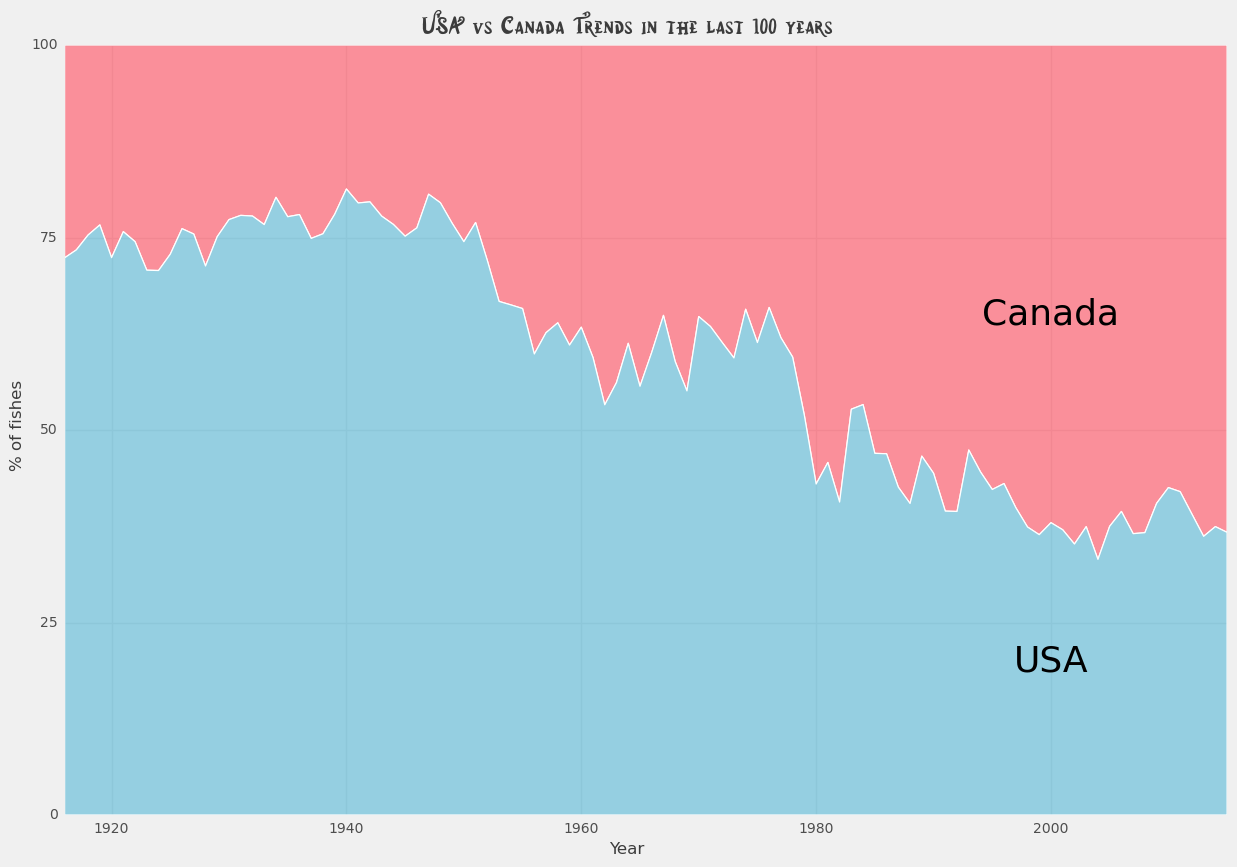

<ggplot: (152123379731)>

In [84]:
p = (
    ggplot(final_grouped_df, aes(x = 'year', y = 'percentage', fill = 'Country'))
    + geom_area(alpha = 0.7, color = 'white')
    + theme_538()
    + scale_x_continuous(expand = [0,0]) #Use expand to remove padding
    + scale_y_continuous(expand = [0,0])
    + labs(x = 'Year', y = '% of fishes', title = 'USA vs Canada Trends in the last 100 years')
    + theme(figure_size=(15, 10), 
    legend_position='none', 
    plot_title=element_text(fontproperties = prop, size = 20), 
    axis_text=element_text(size = 10), 
    axis_title = element_text(size = 12))
    + scale_fill_manual(values = ['#FF6675', '#6EC1DB'])
    + annotate('text', x = 2000, y = 65, label = 'Canada', size = 26, family = 'sans-serif')
    + annotate('text', x = 2000, y = 20, label = 'USA', size = 26, family = 'sans-serif')
)
p

In [21]:
p.save('viz/USA vs Canada Trends.png')

C:\Users\Hemant Rattey\anaconda3\envs\minimalds\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 15 x 10 in image.
C:\Users\Hemant Rattey\anaconda3\envs\minimalds\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: viz/USA vs Canada Trends.png


## Area Chart for multiple fishes stocked

In [22]:
use_cols = ['SID', 'YEAR', 'MONTH', 'DAY', 'LAKE', 'SPECIES', 'STATE_PROV', 'SITE', 'ST_SITE', 'NO_STOCKED', 'LENGTH', 'WEIGHT']

In [23]:
stocked = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-06-08/stocked.csv', usecols=use_cols)
stocked

,SID,YEAR,MONTH,DAY,LAKE,STATE_PROV,SITE,ST_SITE,SPECIES,NO_STOCKED,LENGTH,WEIGHT
0,1,1950,NaN,NaN,MI,ON,PIE ISL-THUNDER CAPE,PIE,LAT,49888.0,999.99,NaN
1,2,1952,4.0,29.0,SU,WI,APOSTLE ISLES,APOSTLE,LAT,102097.0,NaN,816.78
2,3,1952,9.0,23.0,SU,WI,APOSTLE ISLES,APOSTLE,LAT,145000.0,NaN,870
3,4,1952,NaN,NaN,SU,MI,LAUGHING FISH PT,LAUGHING FISH,LAT,65366.0,NaN,588.29
4,5,1953,5.0,27.0,SU,WI,APOSTLE ISLES,APOSTLE,LAT,80137.0,NaN,1442.47
...,...,...,...,...,...,...,...,...,...,...,...,...
56227,20198453,2017,10.0,18.0,HU,ON,Mcgregor Bay,NaN,WAE,2800.0,NaN,18.9
56228,20198454,2017,10.0,18.0,HU,ON,Mcgregor Bay,NaN,WAE,3081.0,NaN,18.9
56229,20198455,2017,10.0,18.0,HU,ON,Mcgregor Bay,NaN,WAE,1685.0,NaN,18.9
56230,20198456,2017,10.0,19.0,HU,ON,Mcgregor Bay,NaN,WAE,2334.0,NaN,19.4


In [24]:
stocked.columns 

Index(['SID', 'YEAR', 'MONTH', 'DAY', 'LAKE', 'STATE_PROV', 'SITE', 'ST_SITE',
       'SPECIES', 'NO_STOCKED', 'LENGTH', 'WEIGHT'],
      dtype='object')

In [25]:
# Groupby species and get total of no_stocked fishes 
grouped_stocked_total = stocked.groupby('SPECIES', as_index=False)['NO_STOCKED'].sum().sort_values('NO_STOCKED', ascending = False)
grouped_stocked_total

,SPECIES,NO_STOCKED
3,CHS,487863147.0
7,LAT,465155185.0
10,RBT,317399473.0
16,WAE,316531240.0
4,COS,207658022.0
2,BNT,133553794.0
0,ATS,20020408.0
1,BKT,16613675.0
12,SPE,14492167.0
17,YEP,6785900.0


In [26]:
# Find the 5 largest species by total number stocked
top5 = grouped_stocked_total.nlargest(5, 'NO_STOCKED')
top5

,SPECIES,NO_STOCKED
3,CHS,487863147.0
7,LAT,465155185.0
10,RBT,317399473.0
16,WAE,316531240.0
4,COS,207658022.0


In [27]:
# Group the stocked by Year and species and sum up the number stocked 
temp = stocked.groupby(['YEAR', 'SPECIES'], as_index=False)['NO_STOCKED'].sum()
temp

,YEAR,SPECIES,NO_STOCKED
0,1950,LAT,49888.0
1,1952,LAT,312463.0
2,1953,LAT,471544.0
3,1954,LAT,499953.0
4,1955,LAT,163538.0
...,...,...,...
562,2018,LAT,6016915.0
563,2018,MUE,1985.0
564,2018,RBT,5671109.0
565,2018,SPE,180437.0


In [28]:
# Keep only those which were in top 5
temp = temp[temp['SPECIES'].isin(top5['SPECIES'].to_list())]
temp

,YEAR,SPECIES,NO_STOCKED
0,1950,LAT,49888.0
1,1952,LAT,312463.0
2,1953,LAT,471544.0
3,1954,LAT,499953.0
4,1955,LAT,163538.0
...,...,...,...
558,2018,CHS,4305278.0
559,2018,COS,2606869.0
562,2018,LAT,6016915.0
564,2018,RBT,5671109.0


In [29]:
# Replace names with full names
temp['SPECIES'] = temp['SPECIES'].replace({"WAE":"Walleye",
      "CHS":"Chinook Salmon",
      "COS":"Coho Salmon",
      "RBT":"Rainbow Trout",
      "LAT":"Lake Trout"})

<ipython-input-29-f34096f69ee3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [30]:
# Convert to category 
temp['SPECIES'] = temp['SPECIES'].astype('category')
temp

<ipython-input-30-dafc58fc27ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,YEAR,SPECIES,NO_STOCKED
0,1950,Lake Trout,49888.0
1,1952,Lake Trout,312463.0
2,1953,Lake Trout,471544.0
3,1954,Lake Trout,499953.0
4,1955,Lake Trout,163538.0
...,...,...,...
558,2018,Chinook Salmon,4305278.0
559,2018,Coho Salmon,2606869.0
562,2018,Lake Trout,6016915.0
564,2018,Rainbow Trout,5671109.0


In [31]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 0 to 566
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   YEAR        263 non-null    int64   
 1   SPECIES     263 non-null    category
 2   NO_STOCKED  263 non-null    float64 
dtypes: category(1), float64(1), int64(1)
memory usage: 6.6 KB


In [32]:
# Reorder the species based on first stocking date -> reordering != ordinal data
temp['SPECIES'] = temp['SPECIES'].cat.reorder_categories(["Walleye", "Chinook Salmon", "Coho Salmon", "Rainbow Trout", "Lake Trout"])
temp['SPECIES']

<ipython-input-32-2446b6c13cd6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0          Lake Trout
1          Lake Trout
2          Lake Trout
3          Lake Trout
4          Lake Trout
            ...      
558    Chinook Salmon
559       Coho Salmon
562        Lake Trout
564     Rainbow Trout
566           Walleye
Name: SPECIES, Length: 263, dtype: category
Categories (5, object): ['Walleye', 'Chinook Salmon', 'Coho Salmon', 'Rainbow Trout', 'Lake Trout']

C:\Users\Hemant Rattey\anaconda3\envs\minimalds\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 15 x 10 in image.
C:\Users\Hemant Rattey\anaconda3\envs\minimalds\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: viz/Evolution of fish stocking.png


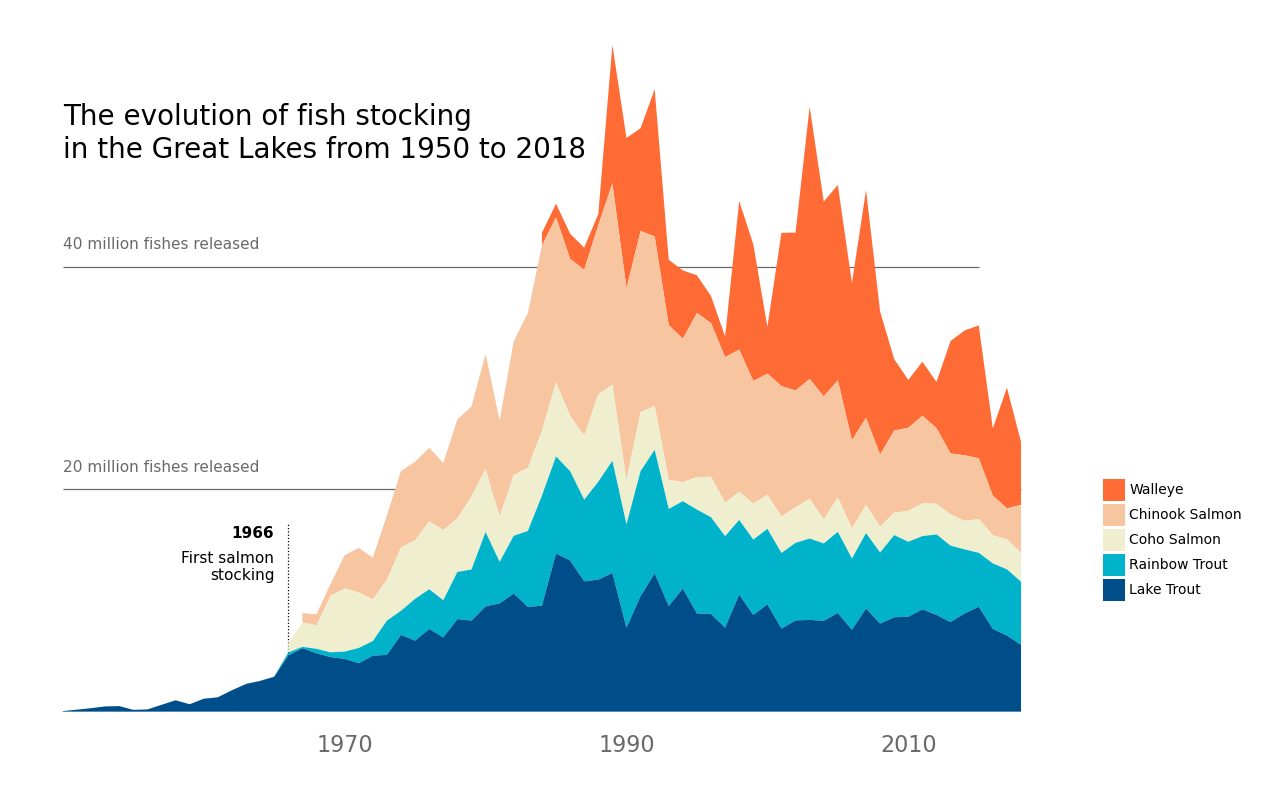

<ggplot: (152127573348)>

In [91]:
p = (
    ggplot(temp, aes(x = 'YEAR', y = 'NO_STOCKED', fill = 'SPECIES'))
    + annotate('segment', x=1950, xend=2015, y=40_000_000, yend=40_000_000, color='dimgrey')
    + annotate('text', x=1950, y=42_000_000, color = 'dimgrey', label="40 million fishes released", family= 'Cabin', ha = 'left')
    + annotate('segment',x=1950,xend=2018,y=20_000_000,yend=20_000_000,color='dimgrey')
    + annotate('text', x=1950, y=22_000_000, color = 'dimgrey', label = "20 million fishes released", family= 'Cabin', ha = 'left')
    + annotate('text', x=1950, y=52000000, color = 'black', size = 20, label = "The evolution of fish stocking\nin the Great Lakes from 1950 to 2018",ha = 'left')
    + annotate('segment', x = 1966, xend = 1966, y = 5_000_000, yend = 17_000_000, linetype = 'dotted')
    + annotate('text',x = 1965, y= 16_000_000, color = 'black', label = "1966",ha = 'right', fontweight='bold')
    + annotate('text',x = 1965, y= 13_000_000, color = 'black', label = "First salmon\nstocking", ha = 'right')
    + geom_area()
    + scale_fill_manual(values = ["#ff6b35", "#f7c59f", "#efefd0", "#00B2CA", "#004e89"])
    + annotate('text', x = 1970, y = -3_000_000, label = '1970', size = 16, color = 'dimgrey')
    + annotate('text', x = 1990, y = -3_000_000, label = '1990', size = 16, color = 'dimgrey')
    + annotate('text', x = 2010, y = -3_000_000, label = '2010', size = 16, color = 'dimgrey')
    + scale_x_continuous(limits = [1950, 2025], breaks = [1970, 1990, 2010])
    + theme(figure_size=(15, 10), 
    axis_line=element_blank(),
    axis_ticks=element_blank(),
    axis_title= element_blank(), 
    panel_background=element_blank(), 
    axis_text=element_blank(), 
    legend_text=element_text(size=10, family = 'sans-serif'), 
    legend_background=element_blank(), 
    panel_grid = element_blank(), 
    legend_position = (0.9, 0.35), 
    legend_title=element_blank())
)
p.save('viz/Evolution of fish stocking.png')
p